In [1]:
import numpy as np
import matplotlib.pyplot as plt

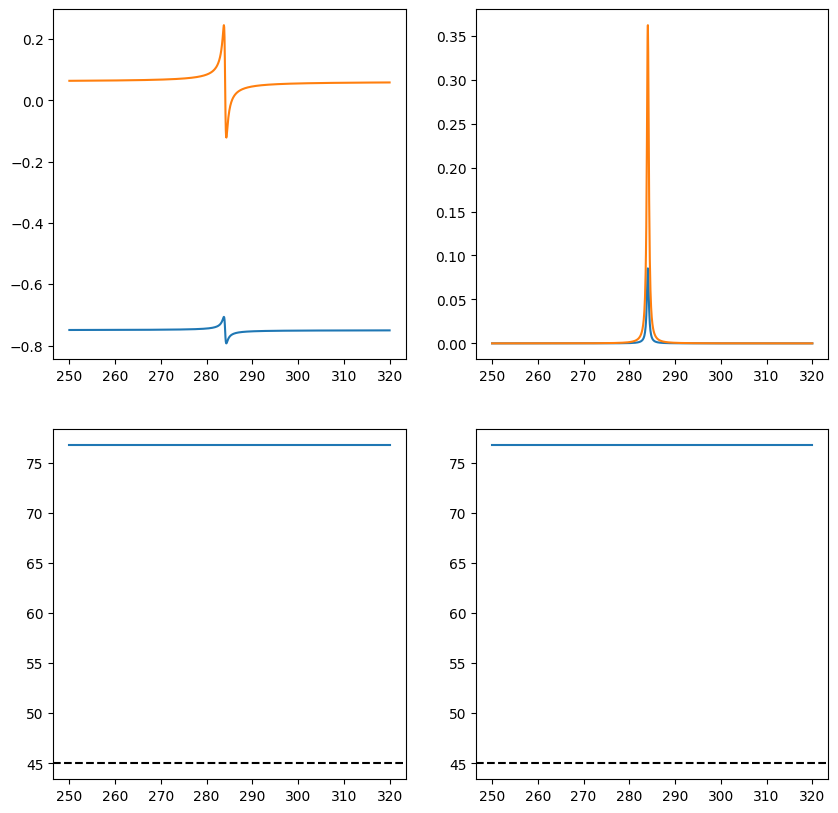

In [81]:
omega = np.linspace(250, 320, 1000)


def n(en, en_0, gamma):
    # hbar in eV
    chi = 100 / (en_0**2 - en**2 - 1j * gamma * en)
    return np.array([[0, 0, 0], [0, 0, 0], [0, 0, np.sqrt(1 + chi)]])


# rotate by a polar angle of pi/2
def R(theta):
    return np.array(
        [
            [np.cos(theta), 0, np.sin(theta)],
            [0, 1, 0],
            [-np.sin(theta), 0, np.cos(theta)],
        ]
    )


# rotate by an azimuthal angle of pi/4
def R2(phi):
    return np.array(
        [[np.cos(phi), -np.sin(phi), 0], [np.sin(phi), np.cos(phi), 0], [0, 0, 1]]
    )


# calculate the effective index by rotating by a polar angle and azimuthally averaging
n_zz = np.zeros_like(omega, dtype=complex)
n_ip = np.zeros_like(omega, dtype=complex)
for i, w in enumerate(omega):
    n_rotated = R(np.pi / 3).T @ n(w, 284, 0.5) @ R(np.pi / 3)
    if n_rotated[2, 2].imag < 0:
        print(R(np.pi / 4))
    # average over azimuthal angle [0, np.pi/2, np.pi, 3*np.pi/2]
    n_0 = n_rotated
    n_1 = R2(np.pi / 2).T @ n_rotated @ R2(np.pi / 2)
    n_2 = R2(np.pi).T @ n_rotated @ R2(np.pi)
    n_3 = R2(3 * np.pi / 2).T @ n_rotated @ R2(3 * np.pi / 2)
    n_avg = n_rotated  # (n_0 + n_1 + n_2 + n_3) / 4
    n_zz[i] = n_avg[2, 2]
    n_ip[i] = np.sqrt(2) * n_avg[0, 0]

# Plot the results
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0, 0].plot(omega, np.real(n_zz) - 1, label="Re(n_zz)")
ax[0, 0].plot(omega, np.real(n_ip) - 1, label="Re(n_xx)")
ax[0, 1].plot(omega, np.imag(n_zz), label="Im(n_zz)")
ax[0, 1].plot(omega, np.imag(n_ip), label="Im(n_xx)")
# calculate the angle between n_zz real and n_xx real
angle_real = np.rad2deg(np.arctan2(np.real(n_ip), np.real(n_zz)))
angle_imag = np.rad2deg(np.arctan2(np.imag(n_ip), np.imag(n_zz)))
ax[1, 0].plot(omega, angle_real, label="angle_real")
ax[1, 0].axhline(45, color="black", linestyle="--")
ax[1, 1].plot(omega, angle_imag, label="angle_imag")
ax[1, 1].axhline(45, color="black", linestyle="--")

In [47]:
effective_n[20]

np.complex128(5.728375353816588e-08+8.251268659494471e-10j)